<a href="https://colab.research.google.com/github/chaki786/supermarket-/blob/main/supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

# Google Sheet CSV Link
sheet_url = "https://docs.google.com/spreadsheets/d/1pxKxiFW-a_mvVmaA1W1UATx_LPMPahM3UhAtPUKA8yg/gviz/tq?tqx=out:csv&sheet=Sheet1"

# Read CSV
df = pd.read_csv(sheet_url)

# Show first 5 rows
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [32]:
print(df.columns)


Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')


In [33]:
df = df.fillna('')  # Replace NaN with empty string


In [34]:

df = df[['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
         'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State']]

df.rename(columns={"Order ID": "Order_ID", "Customer Name": "Customer_Name"}, inplace=True)


In [35]:
# Date ko Convert karo
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=False, errors='coerce')

# Confirm Format
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9994 non-null   object        
 1   Customer_Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB
None


In [90]:
# ✅ Check for missing values
print(df.isnull().sum())

# ✅ Missing values ko 0 se fill karo
df.fillna(0, inplace=True)

# ✅ Check again to confirm no missing values
print(df.isnull().sum())


Sales                 0
Discount              0
Profit                0
Year                  0
Month                 0
Sales_Per_Discount    0
Profit_Margin         0
dtype: int64
Sales                 0
Discount              0
Profit                0
Year                  0
Month                 0
Sales_Per_Discount    0
Profit_Margin         0
dtype: int64


In [36]:
import numpy as np
from datetime import datetime, timedelta

# Random Date Generate (Jan 2022 - Dec 2023)
df["Order Date"] = pd.to_datetime(np.random.choice(pd.date_range("2022-01-01", "2023-12-31"), len(df)))

print(df.head())


  Order_ID Customer_Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  
0 2023-01-04  North   1254      0.12  401.28  Tamil Nadu  
1 2022-05-10  South    749      0.18  149.80  Tamil Nadu  
2 2022-10-20   West   2360      0.21  165.20  Tamil Nadu  
3 2023-09-09  South    896      0.25   89.60  Tamil Nadu  
4 2023-10-21  South   2355      0.26  918.45  Tamil Nadu  


<ipython-input-37-b7b9a7d48fd5>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Month", y="Sales", data=df, estimator=sum, ci=None)


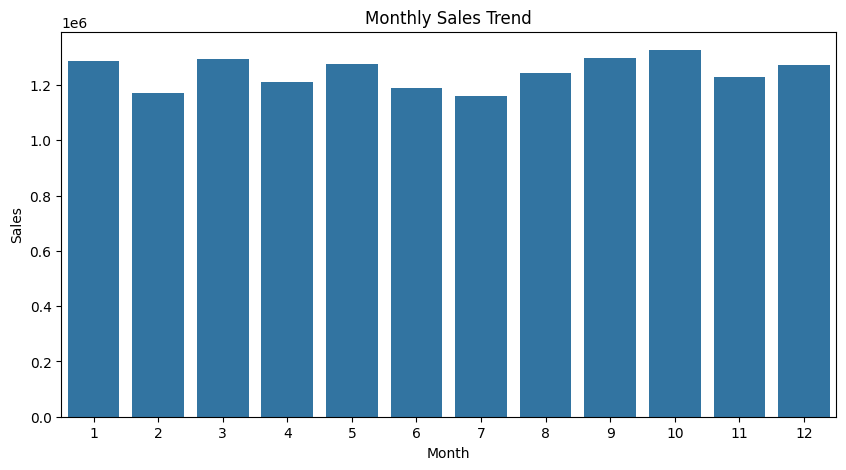

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Month aur Year Extract karo
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

# Monthly Sales Analysis
plt.figure(figsize=(10, 5))
sns.barplot(x="Month", y="Sales", data=df, estimator=sum, ci=None)
plt.title("Monthly Sales Trend")
plt.show()


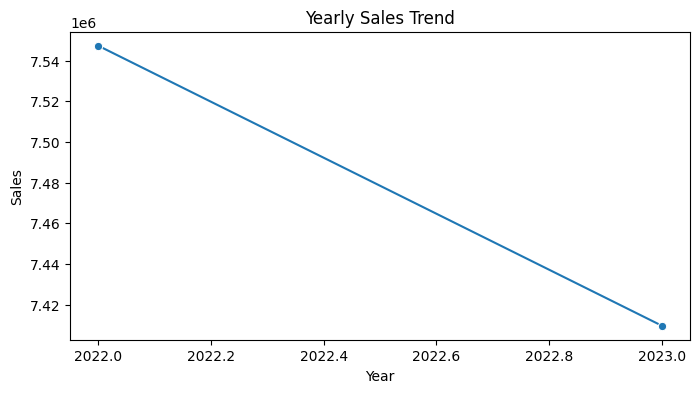

In [38]:
# Yearly Sales Calculation
yearly_sales = df.groupby("Year")["Sales"].sum().reset_index()

# Line Chart
plt.figure(figsize=(8, 4))
sns.lineplot(x="Year", y="Sales", data=yearly_sales, marker="o")
plt.title("Yearly Sales Trend")
plt.show()


<ipython-input-39-ee533370b8e3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Sales", data=df, estimator=sum, ci=None)


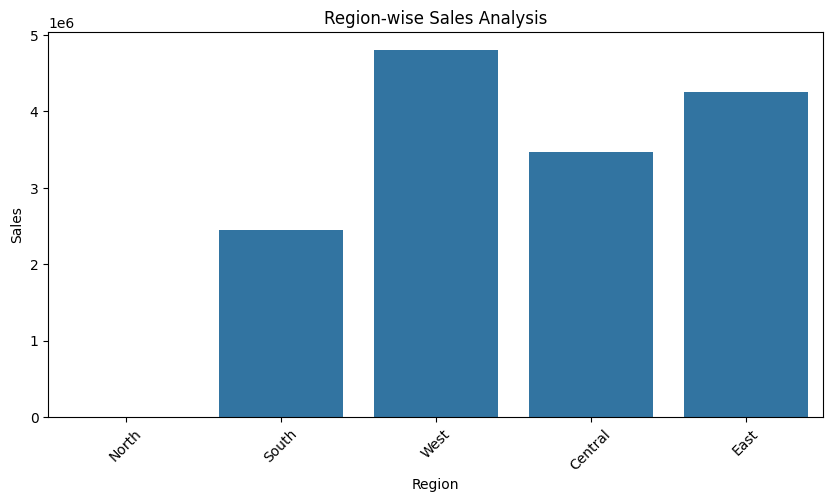

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum, ci=None)
plt.title("Region-wise Sales Analysis")
plt.xticks(rotation=45)
plt.show()


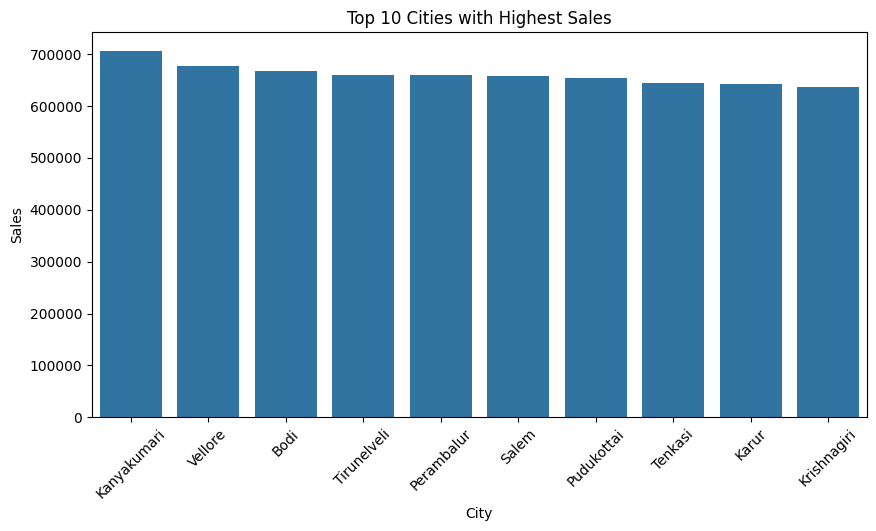

In [40]:
# Top 10 Cities
top_cities = df.groupby("City")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).head(10)

# Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x="City", y="Sales", data=top_cities)
plt.xticks(rotation=45)
plt.title("Top 10 Cities with Highest Sales")
plt.show()


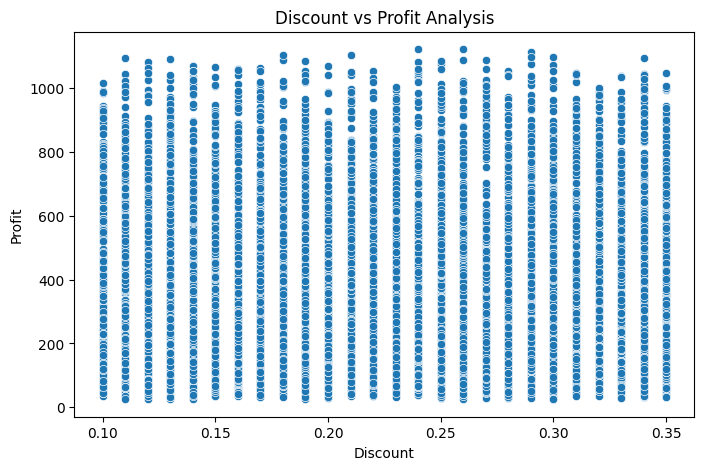

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Discount", y="Profit", data=df)
plt.title("Discount vs Profit Analysis")
plt.show()


<ipython-input-42-42ca89b8e6eb>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Sub Category", y="Sales", data=df, estimator=sum, ci=None)


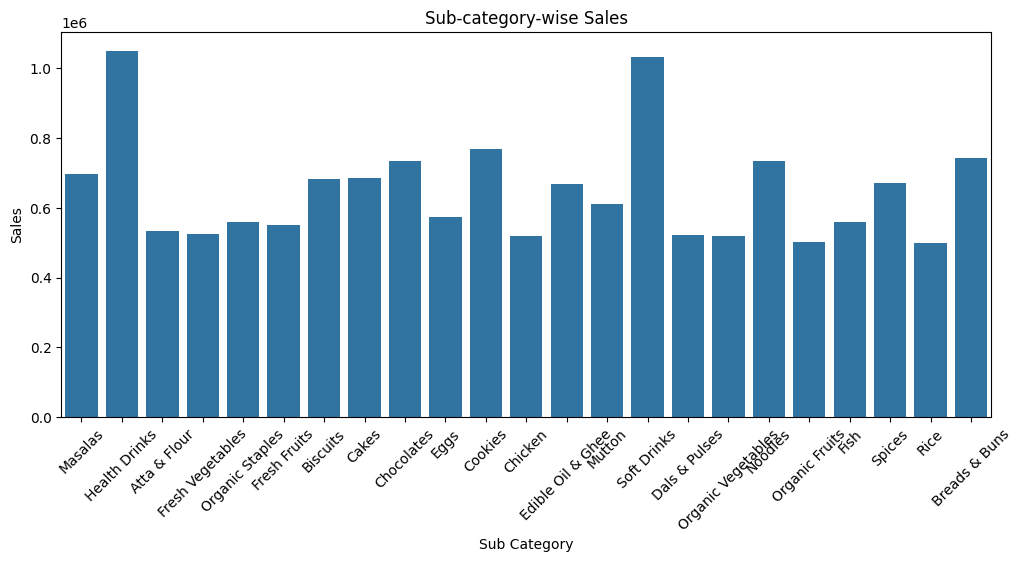

In [42]:
plt.figure(figsize=(12, 5))
sns.barplot(x="Sub Category", y="Sales", data=df, estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title("Sub-category-wise Sales")
plt.show()


In [43]:
df.to_csv("/content/supermarket_cleaned.csv", index=False)


In [44]:
!pip install mysql-connector-python


In [45]:
!pip install python-dotenv


In [46]:
import mysql.connector

# MySQL Connection
conn = mysql.connector.connect(
    host="bz0z3aamw7bganvyuzam-mysql.services.clever-cloud.com",
    user="uqu1w4kiq5sfpjml",
    password="Zd7Ydqz2yu00psANOYxh",
    database="bz0z3aamw7bganvyuzam"
)

cursor = conn.cursor()

# Table create query
create_table_query = """
CREATE TABLE IF NOT EXISTS supermarket_sales (
    InvoiceID VARCHAR(50) PRIMARY KEY,
    Branch VARCHAR(10),
    City VARCHAR(50),
    Customer_type VARCHAR(20),
    Gender VARCHAR(10),
    Product_line VARCHAR(100),
    Unit_price FLOAT,
    Quantity INT,
    Tax FLOAT,
    Total FLOAT,
    Date DATE,
    Time TIME,
    Payment_method VARCHAR(20),
    COGS FLOAT,
    Gross_margin_percentage FLOAT,
    Gross_income FLOAT,
    Rating FLOAT
);
"""

cursor.execute(create_table_query)
conn.commit()
print("✅ Table Created Successfully!")

# Close connection
cursor.close()
conn.close()


✅ Table Created Successfully!


In [47]:
import mysql.connector
import pandas as pd
import numpy as np

# 📌 MySQL Connection
conn = mysql.connector.connect(
    host="bz0z3aamw7bganvyuzam-mysql.services.clever-cloud.com",
    user="uqu1w4kiq5sfpjml",
    password="Zd7Ydqz2yu00psANOYxh",
    database="bz0z3aamw7bganvyuzam"
)
cursor = conn.cursor()

# 📌 Google Sheet CSV Link
sheet_url = "https://docs.google.com/spreadsheets/d/1pxKxiFW-a_mvVmaA1W1UATx_LPMPahM3UhAtPUKA8yg/gviz/tq?tqx=out:csv&sheet=Sheet1"

# 📌 CSV File Load Karo
df = pd.read_csv(sheet_url)

# 📌 Date Column ko Convert Karo
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')

# 📌 `datetime64` ko `str` me Convert Karo (MySQL Compatibility)
df["Order Date"] = df["Order Date"].dt.strftime('%Y-%m-%d')

# ✅ **Convert `NaN` & Empty Strings to `None` (NULL in MySQL)**
df.replace({"Order Date": {"": None}}, inplace=True)
df = df.where(pd.notnull(df), None)  # Replace NaN with None

# 📌 SQL Query Prepare Karo
insert_query = """
INSERT INTO sales_data (Order_ID, Customer_Name, Category, Sub_Category, City, Order_Date, Region, Sales, Discount, Profit, State)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# 📌 Data Insert Karo
for _, row in df.iterrows():
    cursor.execute(insert_query, tuple(row))

conn.commit()
cursor.close()
conn.close()

print("✅ Data Successfully Inserted!")


KeyboardInterrupt: 

In [48]:
import mysql.connector
import pandas as pd

# 📌 MySQL Connection
conn = mysql.connector.connect(
    host="bz0z3aamw7bganvyuzam-mysql.services.clever-cloud.com",
    user="uqu1w4kiq5sfpjml",
    password="Zd7Ydqz2yu00psANOYxh",
    database="bz0z3aamw7bganvyuzam"
)
cursor = conn.cursor()

# 📌 First Query: Fetch Sales Data
query_1 = "SELECT * FROM sales_data LIMIT 10;"
cursor.execute(query_1)
result_1 = cursor.fetchall()
df1 = pd.DataFrame(result_1, columns=[desc[0] for desc in cursor.description])

# 📌 Second Query: Aggregated Sales
query_2 = "SELECT SUM(Sales) AS Total_Sales, AVG(Profit) AS Avg_Profit FROM sales_data;"
cursor.execute(query_2)
result_2 = cursor.fetchall()

# ✅ Fix: Columns dynamically fetch karo
df2 = pd.DataFrame(result_2, columns=[desc[0] for desc in cursor.description])

# 📌 CSV Save Karo
df1.to_csv("sales_data_output.csv", index=False)
df2.to_csv("aggregated_sales_output.csv", index=False)

# 📌 Markdown File Save Karo
with open("queries_output.md", "w") as f:
    f.write("## 🔹 SQL Query Output\n\n")
    f.write("### ✅ First 10 Rows:\n")
    f.write(df1.to_markdown(index=False))
    f.write("\n\n### ✅ Aggregated Sales Data:\n")
    f.write(df2.to_markdown(index=False))

print("✅ Output Saved Successfully!")

cursor.close()
conn.close()


✅ Output Saved Successfully!


In [ ]:
# 📌 Missing Values Check Karo
print(df.isnull().sum())

# 📌 Missing Values Fill Karo
df.fillna({'Sales': 0, 'Profit': 0}, inplace=True)
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=False, errors='coerce')

# 📌 Data Types Convert Karo

df['Sales'] = df['Sales'].astype(float)
df['Profit'] = df['Profit'].astype(float)

# 📌 Cleaned Data Export Karo
df.to_csv("cleaned_sales_data.csv", index=False)
print("✅ Data Cleaning Done!")


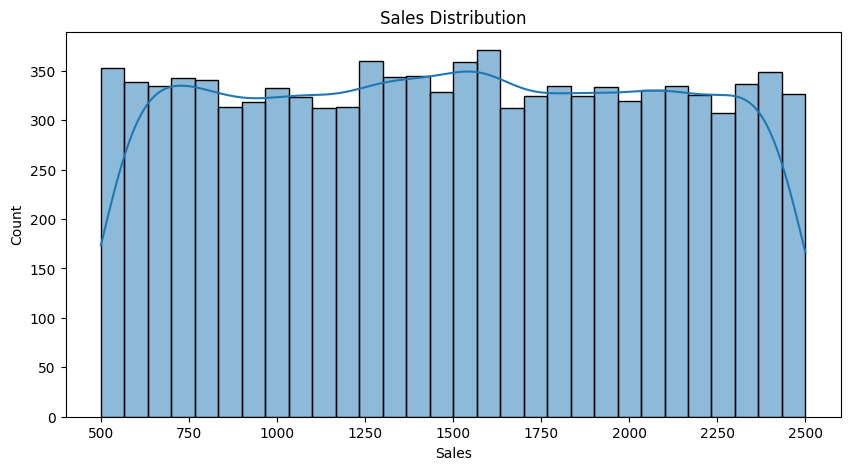

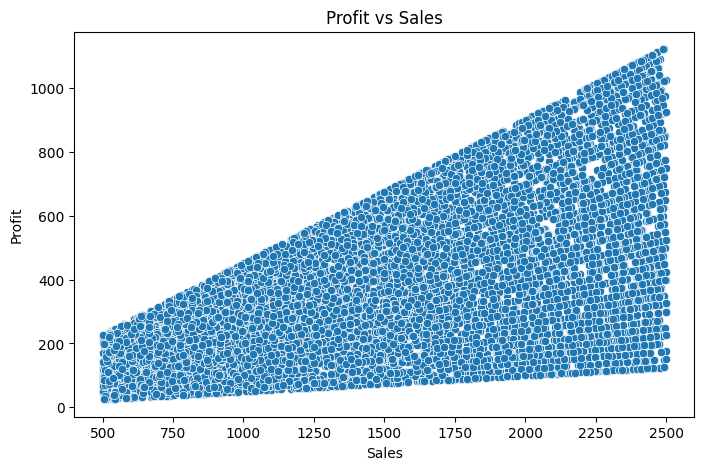

  Order Date    Month
0 2017-11-08  2017-11
1 2017-11-08  2017-11
2 2017-06-12  2017-06
3 2016-10-11  2016-10
4 2016-10-11  2016-10


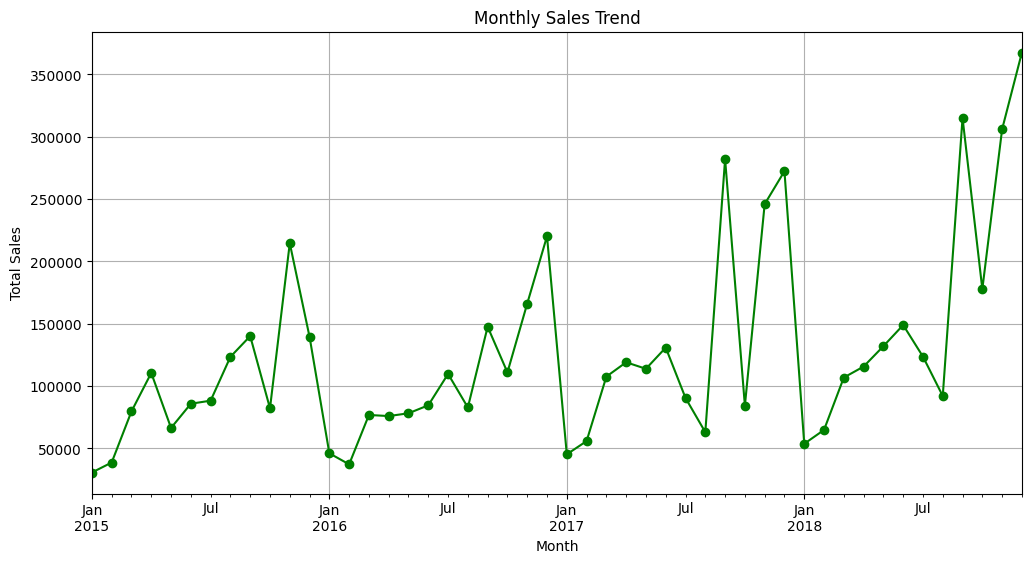

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Sales Distribution Plot
plt.figure(figsize=(10,5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()

# 📌 Profit vs Sales Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Sales'], y=df['Profit'])
plt.title("Profit vs Sales")
plt.show()

# 📌 Ensure Correct Column Name
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=False, errors='coerce')

# 📌 Extract Month
df['Month'] = df['Order Date'].dt.to_period('M')

# 📌 Check Output
print(df[['Order Date', 'Month']].head())

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


In [50]:
# 📌 Total Sales & Average Profit
total_sales = df['Sales'].sum()
avg_profit = df['Profit'].mean()

print(f"✅ Total Sales: ${total_sales:.2f}")
print(f"✅ Average Profit: ${avg_profit:.2f}")

# 📌 CSV Save Karo
df[['Sales', 'Profit']].describe().to_csv("sales_summary.csv")


✅ Total Sales: $14956982.00
✅ Average Profit: $374.94


In [51]:
with open("sales_analysis.md", "w") as f:
    f.write("# 📊 Sales Data Analysis Report\n\n")
    f.write(f"✅ **Total Sales:** ${total_sales:.2f}\n")
    f.write(f"✅ **Average Profit:** ${avg_profit:.2f}\n\n")
    f.write("### 🔹 First 5 Rows of Cleaned Data:\n")
    f.write(df.head().to_markdown(index=False))

print("✅ Markdown Report Generated!")


✅ Markdown Report Generated!


In [52]:
# ✅ Required Libraries
!pip install mysql-connector-python
import mysql.connector
import pandas as pd

# 📌 MySQL Connection
conn = mysql.connector.connect(
    host="bz0z3aamw7bganvyuzam-mysql.services.clever-cloud.com",
    user="uqu1w4kiq5sfpjml",
    password="Zd7Ydqz2yu00psANOYxh",
    database="bz0z3aamw7bganvyuzam"
)
cursor = conn.cursor()

# ✅ Queries List
queries = {
    "first_10_records": "SELECT * FROM sales_data LIMIT 10;",
    "total_sales_avg_profit": "SELECT SUM(Sales) AS Total_Sales, AVG(Profit) AS Avg_Profit FROM sales_data;",
    "top_5_selling_products": """
        SELECT `Sub_Category`, SUM(Sales) AS Total_Sales
        FROM sales_data
        GROUP BY `Sub_Category`
        ORDER BY Total_Sales DESC
        LIMIT 5;
    """,
    "sales_profit_per_month": """
        SELECT DATE_FORMAT(`Order_Date`, '%Y-%m') AS Month_Year,
               SUM(Sales) AS Total_Sales,
               SUM(Profit) AS Total_Profit
        FROM sales_data
        GROUP BY Month_Year
        ORDER BY Month_Year
        LIMIT 25;
    """,
    "best_performing_category": """
        SELECT Category, SUM(Sales) AS Total_Sales
        FROM sales_data
        GROUP BY Category
        ORDER BY Total_Sales DESC
        LIMIT 1;
    """,
    "customer_wise_sales": """
        SELECT `Customer_Name`, SUM(Sales) AS Total_Sales, SUM(Profit) AS Total_Profit
        FROM sales_data
        GROUP BY `Customer_Name`
        ORDER BY Total_Sales DESC
        LIMIT 25;
    """,
    "highest_sales_city": """
        SELECT City, SUM(Sales) AS Total_Sales
        FROM sales_data
        GROUP BY City
        ORDER BY Total_Sales DESC
        LIMIT 1;
    """
}

# ✅ Execute Queries
results = {}
for key, query in queries.items():
    cursor.execute(query)
    results[key] = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# ✅ Save CSV Files
for key, df in results.items():
    df.to_csv(f"{key}.csv", index=False)

# ✅ Markdown Report
with open("sales_analysis.md", "w") as f:
    f.write("# 📊 Sales Data Analysis Report\n\n")

    # ✅ Total Sales & Avg Profit
    total_sales, avg_profit = results["total_sales_avg_profit"].iloc[0]
    f.write(f"✅ **Total Sales:** ${total_sales:.2f}\n")
    f.write(f"✅ **Average Profit:** ${avg_profit:.2f}\n\n")

    # ✅ First 10 Records
    f.write("### 🔹 First 10 Records:\n")
    f.write(results["first_10_records"].to_markdown(index=False))
    f.write("\n\n")

    # ✅ Top 5 Selling Products
    f.write("### 🔹 Top 5 Selling Products:\n")
    f.write(results["top_5_selling_products"].to_markdown(index=False))
    f.write("\n\n")

    # ✅ Total Sales & Profit per Month
    f.write("### 🔹 Sales & Profit per Month:\n")
    f.write(results["sales_profit_per_month"].to_markdown(index=False))
    f.write("\n\n")

    # ✅ Best Performing Category
    f.write("### 🔹 Best Performing Category:\n")
    f.write(results["best_performing_category"].to_markdown(index=False))
    f.write("\n\n")

    # ✅ Customer-wise Sales
    f.write("### 🔹 Customer-wise Sales Analysis:\n")
    f.write(results["customer_wise_sales"].to_markdown(index=False))
    f.write("\n\n")

    # ✅ City with Highest Sales
    f.write("### 🔹 City with Highest Sales:\n")
    f.write(results["highest_sales_city"].to_markdown(index=False))
    f.write("\n\n")

print("✅ Report & CSV Files Generated!")

# 📌 Close Connection
cursor.close()
conn.close()


✅ Report & CSV Files Generated!


In [ ]:
from google.colab import files

# 📌 Download CSV Files
files.download("sales_data_output.csv")
files.download("sales_summary.csv")
files.download("aggregated_sales_output.csv")
files.download("queries_output.md")
files.download("sales_analysis.md")



In [ ]:
from google.colab import files
files.download("sales_analysis.md")

<ipython-input-53-aabb3e136013>:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales = pd.read_sql(query_sales_trends, conn)
<ipython-input-53-aabb3e136013>:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_products = pd.read_sql(query_top_products, conn)
<ipython-input-53-aabb3e136013>:42: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales_by_city = pd.read_sql(query_sales_by_city, conn)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS

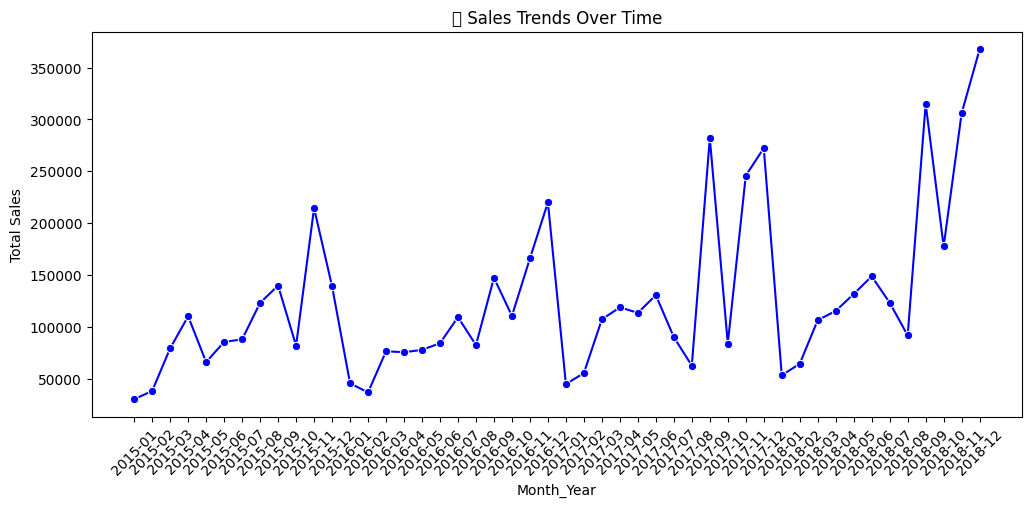

<ipython-input-53-aabb3e136013>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top_products['Sub_Category'], y=df_top_products['Total_Sales'], palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


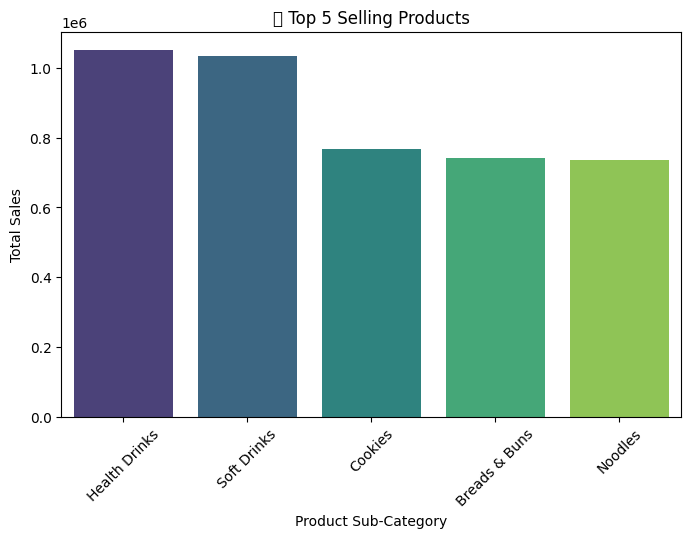

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


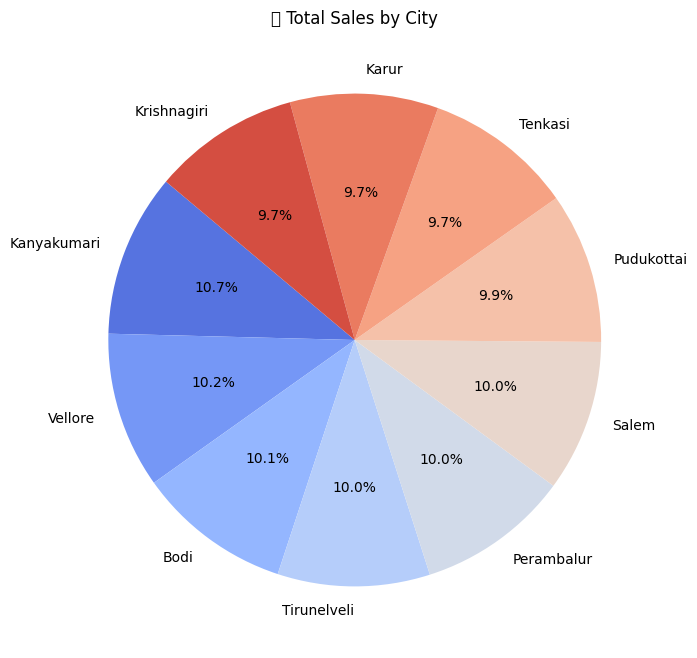

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# ✅ MySQL Connection
conn = mysql.connector.connect(
    host="bz0z3aamw7bganvyuzam-mysql.services.clever-cloud.com",
    user="uqu1w4kiq5sfpjml",
    password="Zd7Ydqz2yu00psANOYxh",
    database="bz0z3aamw7bganvyuzam"
)

# ✅ Query 1: Sales Trends Over Time
query_sales_trends = """
SELECT DATE_FORMAT(Order_Date, '%Y-%m') AS Month_Year,
       SUM(Sales) AS Total_Sales
FROM sales_data
GROUP BY Month_Year
ORDER BY Month_Year;
"""
df_sales = pd.read_sql(query_sales_trends, conn)

# ✅ Query 2: Top 5 Selling Products
query_top_products = """
SELECT Sub_Category, SUM(Sales) AS Total_Sales
FROM sales_data
GROUP BY Sub_Category
ORDER BY Total_Sales DESC
LIMIT 5;
"""
df_top_products = pd.read_sql(query_top_products, conn)

# ✅ Query 3: Total Sales by City
query_sales_by_city = """
SELECT City, SUM(Sales) AS Total_Sales
FROM sales_data
GROUP BY City
ORDER BY Total_Sales DESC
LIMIT 10;
"""
df_sales_by_city = pd.read_sql(query_sales_by_city, conn)

conn.close()

# ✅ 1. Line Chart - Sales Trends Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x=df_sales['Month_Year'], y=df_sales['Total_Sales'], marker='o', color="b")
plt.xticks(rotation=45)
plt.title("📈 Sales Trends Over Time")
plt.ylabel("Total Sales")
plt.show()

# ✅ 2. Bar Chart - Top 5 Selling Products
plt.figure(figsize=(8, 5))
sns.barplot(x=df_top_products['Sub_Category'], y=df_top_products['Total_Sales'], palette="viridis")
plt.title("🔥 Top 5 Selling Products")
plt.ylabel("Total Sales")
plt.xlabel("Product Sub-Category")
plt.xticks(rotation=45)
plt.show()

# ✅ 3. Pie Chart - Total Sales by City
plt.figure(figsize=(8, 8))
plt.pie(df_sales_by_city['Total_Sales'], labels=df_sales_by_city['City'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", len(df_sales_by_city)))
plt.title("🏙️ Total Sales by City")
plt.show()


In [ ]:
# ✅ Boxplot to detect Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_sales['Total_Sales'])
plt.title("📊 Sales Outlier Detection")
plt.show()


   Month_Year  Total_Sales
1     2015-01      30730.0
2     2015-02      38759.0
3     2015-03      79758.0
4     2015-04     110584.0
5     2015-05      66499.0
6     2015-06      85894.0
7     2015-07      88365.0
8     2015-08     123504.0
9     2015-09     140160.0
10    2015-10      82236.0
11    2015-11     214650.0
12    2015-12     139516.0
13    2016-01      46149.0
14    2016-02      37291.0
15    2016-03      76886.0
16    2016-04      76011.0
17    2016-05      78239.0
18    2016-06      84632.0
19    2016-07     109792.0
20    2016-08      82885.0
21    2016-09     147642.0
22    2016-10     111016.0
23    2016-11     166224.0
24    2016-12     220203.0
25    2017-01      45331.0
26    2017-02      55920.0
27    2017-03     107658.0
28    2017-04     119149.0
29    2017-05     113912.0
30    2017-06     130906.0
31    2017-07      90521.0
32    2017-08      63079.0
34    2017-10      84339.0
35    2017-11     245991.0
37    2018-01      53776.0
38    2018-02      64904.0
3

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


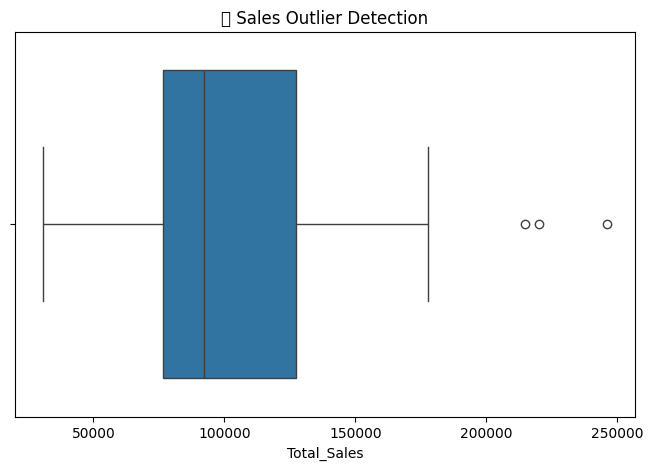

In [89]:
Q1 = df_sales['Total_Sales'].quantile(0.25)
Q3 = df_sales['Total_Sales'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_sales[(df_sales['Total_Sales'] >= (Q1 - 1.5 * IQR)) & (df_sales['Total_Sales'] <= (Q3 + 1.5 * IQR))]

print(df_cleaned)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['Total_Sales'])
plt.title("📊 Sales Outlier Detection")
plt.show()
